# Titanic

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set_style('whitegrid')
%matplotlib inline
sns.set_palette("husl")


## Obtaining Data

In [92]:
train = pd.read_csv('train.csv')

In [93]:
test = pd.read_csv('test.csv')

In [5]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [94]:
train.drop(['PassengerId','Ticket','Cabin'], axis=1, inplace=True)
test.drop(['PassengerId','Ticket','Cabin'], axis=1, inplace=True)

In [95]:
print("Train has NA: {} \n Test has NA: {}".format(any(train.isna()),any(test.isna())))

Train has NA: True 
 Test has NA: True


## EDA 

In [32]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


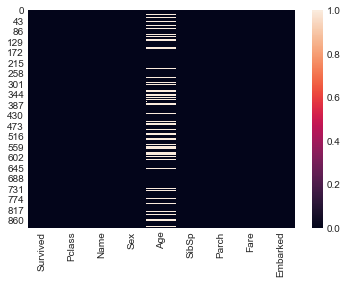

In [16]:
sns.heatmap(train.isna())

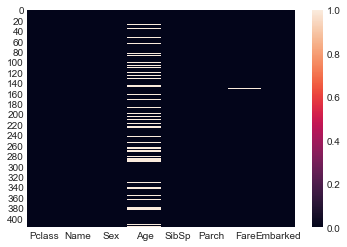

In [17]:
sns.heatmap(test.isna())

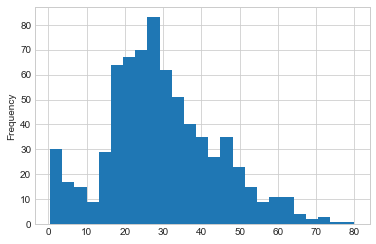

In [23]:
train['Age'].dropna().plot.hist(bins=25)

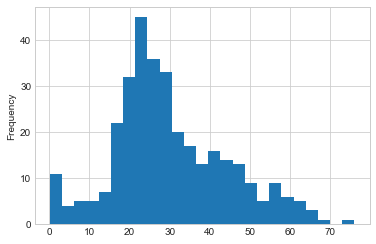

In [63]:
test['Age'].dropna().plot.hist(bins=25)

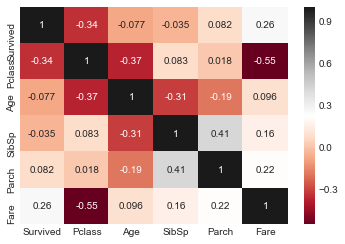

In [82]:
sns.heatmap(train.corr(),annot=True,cmap='RdGy')

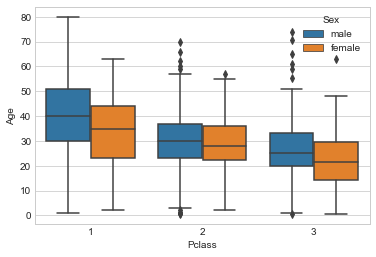

In [38]:
sns.boxplot(x= 'Pclass', y = 'Age',data=train,hue='Sex')

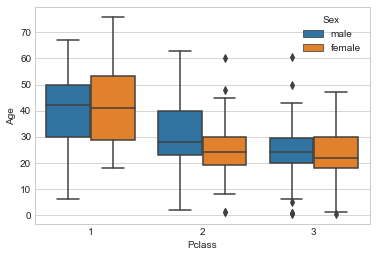

In [43]:
sns.boxplot(x= 'Pclass', y = 'Age',data=test,hue='Sex')

In [96]:
def med_ages(data):
    sopt = ['male','female']
    copt = [1,2,3]
    n=[]
    for sex in sopt:
        for cass in copt:
            n.append(data[(data['Sex']==sex) & (data['Pclass']==cass)].dropna().median()['Age'])
    return n 

In [97]:
med_ages(train)

[40.0, 30.0, 25.0, 35.0, 28.0, 21.5]

Using the Median age based on sex and PClass, I need to apply it to the Null Values

In [104]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    Sex = cols[2]
    if pd.isnull(Age):
        if Sex=='male':
            if Pclass==1:
                Age=40
            elif Pclass==2:
                Age = 30
            else:
                Age = 25
        else:
            if Pclass==1:
                Age=35
            elif Pclass==2:
                Age = 28
            else:
                Age = 21.5
    else:
        Age = Age
    return Age

In [105]:
train['Age'] = train[['Age','Pclass','Sex']].apply(impute_age, axis=1)

In [108]:
any(train['Age'].isna())

False

All values of Age is filled, need to check the rest of the dataframe 

In [109]:
any(train.isna())

True

In [110]:
train.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [112]:
train[train.isna().any(axis=1)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN


Will just fill the Embarked location with the most common one that Pclass 1 comes from

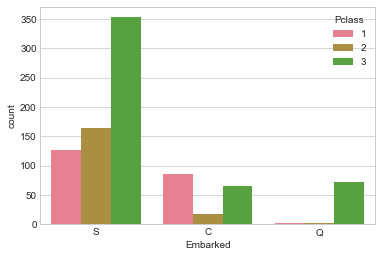

In [113]:
sns.countplot(x='Embarked',data=train,hue='Pclass')

Since S contains the most amount of people from Pclass 1, we'll change the Pclass null values to S. Although, C is also close, since it's two data points, I do not believe it should disrupt the outcome too much

In [119]:
train['Embarked'].fillna('S',inplace=True)

In [124]:
train.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [125]:
test.isna().sum()

Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [126]:
test['Age'] = train[['Age','Pclass','Sex']].apply(impute_age, axis=1)

In [129]:
test[test.isna().any(axis=1)]

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
152,3,"Storey, Mr. Thomas",male,55.5,0,0,NaN,S


In [131]:
test['Fare'].fillna(train['Fare'].median(), inplace=True)

In [132]:
test.isna().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Null Values have been dealt with for both training and testing set. 

In [134]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.112424,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.304424,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.500000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [135]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,28.252990,0.447368,0.392344,35.576535
std,0.841838,12.960305,0.896760,0.981429,55.850103
min,1.000000,0.830000,0.000000,0.000000,0.000000
25%,1.000000,21.500000,0.000000,0.000000,7.895800
50%,3.000000,25.000000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.471875
max,3.000000,71.000000,8.000000,9.000000,512.329200


There are certain columns we can make into classes, such as Pclass, SibSP, etc. Also we can feature engineer titles with the names. 

In [136]:
def is_alone(cols):
    Age=cols[0]
    sibsp = cols[1]
    parch = cols[2]
    if (sibsp + parch) == 0:
        if Age > 16:
            return 1
        else:
            return 0
    else: 
        return 0
    

Knowing Siblings,spouse, parents, children seem to be a lot of factors. I want to simplify it to a factor Alone where it shows whether the passenger came alone to the ship. The text says that if the kids are brought by a distant relative, they would not count in the ParCh column. So accounting the estimated age of when some would be able to go on a ship, I said if the passenger is recorded to not have parents, siblings, spouse, or child and they are over the age of 16, they would count as alone. Otherwise, they did not come on the ship alone

In [137]:
train['Alone'] = train[['Age','SibSp','Parch']].apply(is_alone,axis=1)
test['Alone'] = test[['Age','SibSp','Parch']].apply(is_alone,axis=1)

In [138]:
train['Alone'].sum()

521

So as we can see, there was 521 people that came on the boat alone. 

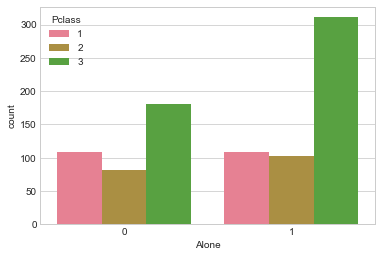

In [141]:
sns.countplot(x='Alone', data=train, hue='Pclass')

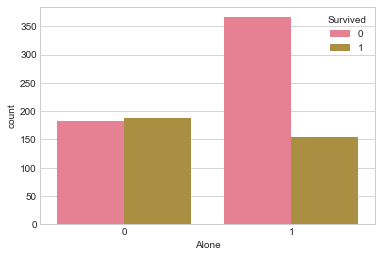

In [143]:
sns.countplot(x='Alone', data=train, hue='Survived')

In [146]:
train['title']=train['Name'].apply(lambda name: name.split(sep=',')[1].split(sep='.')[0].strip())
test['title'] =test['Name'].apply(lambda name: name.split(sep=',')[1].split(sep='.')[0].strip())

In [158]:
train['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

Everyone seems to have a title regardless of age, so instead of testing for each, I will seperate it into Titles if they are common vs special

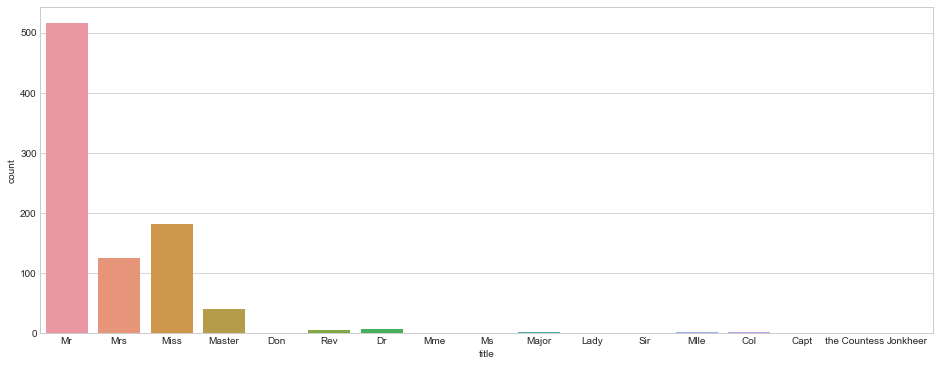

In [161]:
plt.figure(figsize=(16,6))
sns.countplot(train['title'])

In [184]:
common = ['Mr', 'Mrs','Miss']
train['title']=train['title'].apply(lambda x: 1 if x in common else 0)
test['title']=test['title'].apply(lambda x: 1 if x in common else 0)

Now I am going to be making dummy variables for several of my variables

In [193]:
def present(col):
    if col > 0:
        return 1
    else: 
        return 0

fam = ('SibSp', 'Parch')
for fac in fam:
    train[fac] = train[fac].apply(present)
    test[fac]=test[fac].apply(present)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Alone,title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1


In [194]:
items=['Sex','Embarked','Pclass']
for cols in items:
    add = pd.get_dummies(train[cols],drop_first=True)
    train=pd.concat([train,add], axis=1)
for cols in items:
    add = pd.get_dummies(test[cols],drop_first=True)
    test=pd.concat([test,add], axis=1)

In [195]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Alone,title,male,Q,S,2,3
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,1,1,0,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0,1,0,0,0,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,0,0,1,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0,1,0,0,1,0,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,1,0,1,0,1


In [196]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Alone,title,male,Q,S,2,3
0,3,"Kelly, Mr. James",male,22.0,0,0,7.8292,Q,1,1,1,1,0,0,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,38.0,1,0,7.0000,S,0,1,0,0,1,0,1
2,2,"Myles, Mr. Thomas Francis",male,26.0,0,0,9.6875,Q,1,1,1,1,0,1,0
3,3,"Wirz, Mr. Albert",male,35.0,0,0,8.6625,S,1,1,1,0,1,0,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,35.0,1,1,12.2875,S,0,1,0,0,1,0,1


In [202]:
df =[test,train]
droppings= ['Pclass','Name','Sex','Embarked']
for things in df:
    things.drop(droppings,axis=1,inplace=True)

In [203]:
train.head()

,Survived,Age,SibSp,Parch,Fare,Alone,title,male,Q,S,2,3
0,0,22.0,1,0,7.2500,0,1,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,1,0,0,0,0,0
2,1,26.0,0,0,7.9250,1,1,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,1,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,1,1,0,1,0,1


In [204]:
test.head()

,Age,SibSp,Parch,Fare,Alone,title,male,Q,S,2,3
0,22.0,0,0,7.8292,1,1,1,1,0,0,1
1,38.0,1,0,7.0000,0,1,0,0,1,0,1
2,26.0,0,0,9.6875,1,1,1,1,0,1,0
3,35.0,0,0,8.6625,1,1,1,0,1,0,1
4,35.0,1,1,12.2875,0,1,0,0,1,0,1


## Model Testing 

In [221]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

Will be doing a static split of the train data set before applying to the test data frame. I will try various machine learning techniques. 

In [207]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30)

In [223]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions_log = logmodel.predict(X_test)

In [227]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, predictions_log))
print(confusion_matrix(y_test, predictions))

             precision    recall  f1-score   support

          0       0.81      0.91      0.85       169
          1       0.79      0.63      0.70        99

avg / total       0.80      0.80      0.80       268

[[126  43]
 [ 44  55]]


In [228]:
rfc = RandomForestClassifier(n_estimators=20000)
rfc.fit(X_train,y_train)
predictions_rfc = rfc.predict(X_test)
print(classification_report(y_test, predictions_rfc))
print(confusion_matrix(y_test, predictions))

             precision    recall  f1-score   support

          0       0.87      0.89      0.88       169
          1       0.81      0.78      0.79        99

avg / total       0.85      0.85      0.85       268

[[126  43]
 [ 44  55]]


In [229]:
model = SVC()
model.fit(X_train,y_train)
predictions_svc = model.predict(X_test)
print(classification_report(y_test, predictions_svc))
print(confusion_matrix(y_test, predictions))

             precision    recall  f1-score   support

          0       0.74      0.75      0.74       169
          1       0.56      0.56      0.56        99

avg / total       0.67      0.68      0.68       268

[[126  43]
 [ 44  55]]


In [230]:
param_grid = {'C': [0.1,1, 10, 100, 1000,10000], 'gamma': [1,0.1,0.01,0.001,0.0001,.00001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)
grid.best_params_
grid.best_estimator_
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))
print(confusion_matrix(y_test, predictions))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6105769230769231, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6105769230769231, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6086956521739131, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6105769230769231, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6105769230769231, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6086956521739131, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...........................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.7101449275362319, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV]  C=0.1, gamma=0.0001, kernel=rbf, score=0.6490384615384616, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV]  C=0.1, gamma=0.0001, kernel=rbf, score=0.6442307692307693, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV]  C=0.1, gamma=0.0001, kernel=rbf, score=0.7004830917874396, total=   0.0s
[CV] C=0.1, gamma=1e-05, kernel=rbf ..................................
[CV]  C=0.1, gamma=1e-05, kernel=rbf, score=0.6201923076923077, total=   0.0s
[CV] C=0.1, gamma=1e-05, kernel=rbf ..................................
[CV]  C=0.1, gamma=1e-05, kernel=rbf, score=0.6201923076923077, total=   0.0s
[CV] C=0.1, gamma=1e-05, kernel=rbf ..................................
[CV]  C=0.1, gamma=1e-05, kernel

[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.7355769230769231, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.5721153846153846, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.6521739130434783, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV]  C=1000, gamma=0.01, kernel=rbf, score=0.7692307692307693, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV]  C=1000, gamma=0.01, kernel=rbf, score=0.6586538461538461, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV]  C=1000, gamma=0.01, kernel=rbf, score=0.7101449275362319, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV]  C=1000, gamma=0.001, kernel=rbf, score=0.7932692307692307, total=   0.1s
[CV] C=1000, gamma=0.001, kern

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    6.3s finished


             precision    recall  f1-score   support

          0       0.83      0.88      0.86       169
          1       0.78      0.70      0.73        99

avg / total       0.81      0.81      0.81       268

[[126  43]
 [ 44  55]]


In [231]:
print("These are the scores\nLogistic: {}\nRandomForest: {}\nSVC: {}".format(logmodel.score(X_test,y_test)
,rfc.score(X_test,y_test)
,grid.score(X_test,y_test)))


These are the scores
Logistic: 0.8022388059701493
RandomForest: 0.8507462686567164
SVC: 0.8134328358208955


In [246]:
X= train.drop('Survived',axis=1)
Y= train['Survived']

In [250]:
Passid=pd.read_csv('test.csv')
rfc.fit(X,Y)
predictions1 = rfc.predict(test)
submission = pd.DataFrame({
        "PassengerId": Passid["PassengerId"],
        "Survived": predictions1
    })
submission.to_csv('submission.csv', index=False)


In [249]:
grid.fit(X,Y)
predictions1 = grid.predict(test)
submission = pd.DataFrame({
        "PassengerId": Passid["PassengerId"],
        "Survived": predictions1
    })
submission.to_csv('submission.csv', index=False)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6161616161616161, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6161616161616161, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6161616161616161, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6161616161616161, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6161616161616161, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6161616161616161, total=   0.0s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s



[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.632996632996633, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.6363636363636364, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.6296296296296297, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.6060606060606061, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.6902356902356902, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.6734006734006734, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV]  C=0.1, gamma=0.0001, kernel=rbf,

[CV]  C=100, gamma=0.001, kernel=rbf, score=0.7609427609427609, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV]  C=100, gamma=0.001, kernel=rbf, score=0.7946127946127947, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV]  C=100, gamma=0.001, kernel=rbf, score=0.8080808080808081, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.6868686868686869, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.7946127946127947, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.7710437710437711, total=   0.0s
[CV] C=100, gamma=1e-05, kernel=rbf ..................................
[CV]  C=100, gamma=1e-05, kernel=rbf, score=0.6262626262626263, total=   0.0s
[CV] C=100, gamma=1e-05, 

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:   12.9s finished


In [248]:
logmodel.fit(X,Y)
predictions1 = logmodel.predict(test)
submission = pd.DataFrame({
        "PassengerId": Passid["PassengerId"],
        "Survived": predictions1
    })
submission.to_csv('submission.csv', index=False)


## Testing with less variables

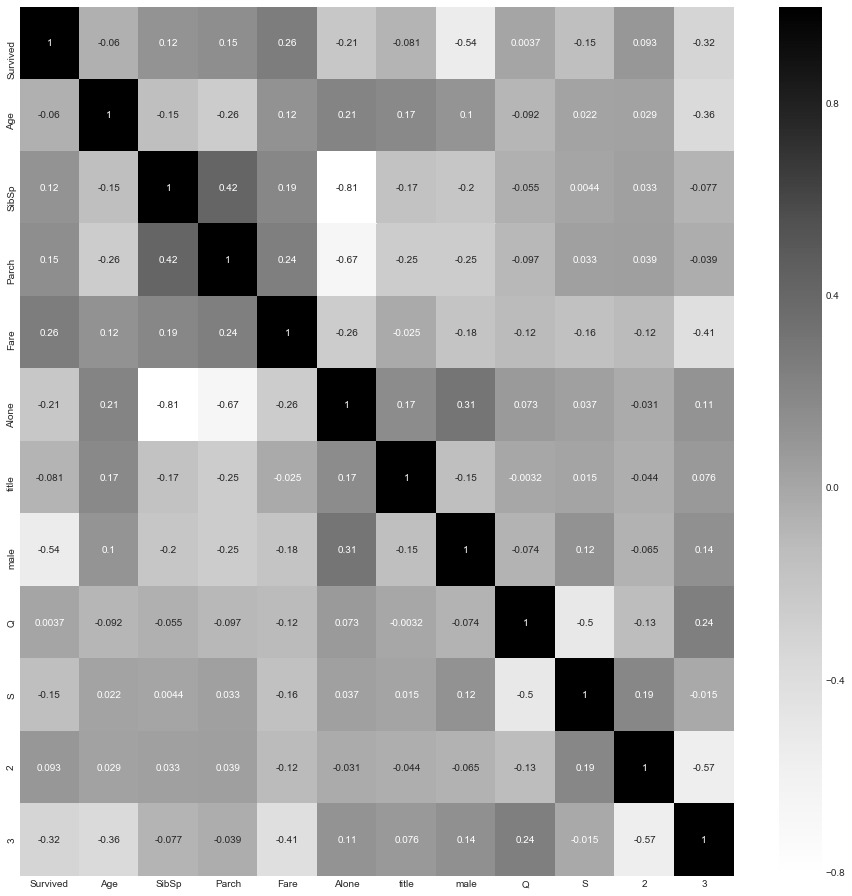

In [243]:
plt.figure(figsize=(16,16))
sns.heatmap(train.corr(),annot=True,cmap='Greys')

In [244]:
train.head()

,Survived,Age,SibSp,Parch,Fare,Alone,title,male,Q,S,2,3
0,0,22.0,1,0,7.2500,0,1,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,1,0,0,0,0,0
2,1,26.0,0,0,7.9250,1,1,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,1,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,1,1,0,1,0,1


In [287]:
training = train.drop(['title','Fare'],axis=1)
testing= test.drop(['title','Fare'],axis=1)

In [290]:
X_training = training.drop('Survived',axis=1)
y_training = training['Survived']
X_train, X_test, y_train, y_test = train_test_split(X_training, 
                                                    y_training, test_size=0.30)

In [291]:
logmodel.fit(X_train,y_train)
predictions_log = logmodel.predict(X_test)
print(classification_report(y_test, predictions_log))
print(confusion_matrix(y_test, predictions))

             precision    recall  f1-score   support

          0       0.87      0.85      0.86       171
          1       0.75      0.78      0.77        97

avg / total       0.83      0.83      0.83       268

[[109  62]
 [ 61  36]]


In [269]:
rfc.fit(X_train,y_train)
predictions_rfc = rfc.predict(X_test)
print(classification_report(y_test, predictions_rfc))
print(confusion_matrix(y_test, predictions))

             precision    recall  f1-score   support

          0       0.81      0.85      0.83       154
          1       0.79      0.74      0.76       114

avg / total       0.80      0.80      0.80       268

[[99 55]
 [71 43]]


In [270]:
grid.fit(X_train,y_train)
grid.best_params_
grid.best_estimator_
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))
print(confusion_matrix(y_test, predictions))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6346153846153846, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6346153846153846, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6328502415458938, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6346153846153846, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6346153846153846, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6328502415458938, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...........................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.6328502415458938, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV]  C=0.1, gamma=0.0001, kernel=rbf, score=0.6346153846153846, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV]  C=0.1, gamma=0.0001, kernel=rbf, score=0.6346153846153846, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV]  C=0.1, gamma=0.0001, kernel=rbf, score=0.6328502415458938, total=   0.0s
[CV] C=0.1, gamma=1e-05, kernel=rbf ..................................
[CV]  C=0.1, gamma=1e-05, kernel=rbf, score=0.6346153846153846, total=   0.0s
[CV] C=0.1, gamma=1e-05, kernel=rbf ..................................
[CV]  C=0.1, gamma=1e-05, kernel=rbf, score=0.6346153846153846, total=   0.0s
[CV] C=0.1, gamma=1e-05, kernel=rbf ..................................
[CV]  C=0.1, gamma=1e-05, kernel=rbf, score=0.6328502415458938, total=   0.0s
[CV] C=1, gamma=1, kernel

[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.7692307692307693, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.7932692307692307, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.7294685990338164, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV]  C=1000, gamma=0.01, kernel=rbf, score=0.7692307692307693, total=   0.2s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV]  C=1000, gamma=0.01, kernel=rbf, score=0.7644230769230769, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV]  C=1000, gamma=0.01, kernel=rbf, score=0.7971014492753623, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV]  C=1000, gamma=0.001, kernel=rbf, score=0.7788461538461539, total=   0.0s
[CV] C=1000, gamma=0.001, kern

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    5.8s finished


             precision    recall  f1-score   support

          0       0.78      0.86      0.82       154
          1       0.79      0.68      0.73       114

avg / total       0.78      0.78      0.78       268

[[99 55]
 [71 43]]


In [271]:
print("These are the scores\nLogistic: {}\nRandomForest: {}\nSVC: {}".format(logmodel.score(X_test,y_test)
,rfc.score(X_test,y_test)
,grid.score(X_test,y_test)))


These are the scores
Logistic: 0.7910447761194029
RandomForest: 0.8022388059701493
SVC: 0.7835820895522388


In [260]:
rfc.fit(X_training,y_training)
predictions1 = rfc.predict(testing)
submission = pd.DataFrame({
        "PassengerId": Passid["PassengerId"],
        "Survived": predictions1
    })
submission.to_csv('submission.csv', index=False)


In [261]:
grid.fit(X_training,y_training)
predictions1 = grid.predict(testing)
submission = pd.DataFrame({
        "PassengerId": Passid["PassengerId"],
        "Survived": predictions1
    })
submission.to_csv('submission.csv', index=False)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6161616161616161, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.622895622895623, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6161616161616161, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6161616161616161, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6161616161616161, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6161616161616161, total=   0.0s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s



[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.632996632996633, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.6397306397306397, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.6296296296296297, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.6060606060606061, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.6902356902356902, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.6734006734006734, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV]  C=0.1, gamma=0.0001, kernel=rbf,

[CV]  C=100, gamma=0.01, kernel=rbf, score=0.7710437710437711, total=   0.1s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV]  C=100, gamma=0.001, kernel=rbf, score=0.7643097643097643, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV]  C=100, gamma=0.001, kernel=rbf, score=0.7946127946127947, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV]  C=100, gamma=0.001, kernel=rbf, score=0.797979797979798, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.6902356902356902, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.7946127946127947, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.7710437710437711, total=   0.0s
[CV] C=100, gamma=1e-05, ke

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:   12.6s finished


In [292]:
logmodel.fit(X_training,y_training)
predictions1 = logmodel.predict(testing)
submission = pd.DataFrame({
        "PassengerId": Passid["PassengerId"],
        "Survived": predictions1
    })
submission.to_csv('submission.csv', index=False)


In [264]:
train.head()

,Survived,Age,SibSp,Parch,Fare,Alone,title,male,Q,S,2,3
0,0,22.0,1,0,7.2500,0,1,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,1,0,0,0,0,0
2,1,26.0,0,0,7.9250,1,1,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,1,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,1,1,0,1,0,1


In [265]:
training.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


## Trying K-Folds

In [275]:
from sklearn.model_selection import KFold, StratifiedKFold

In [286]:
skf = StratifiedKFold(n_splits=3)
print(skf)
for train_index,test_index in skf.split(X_training,y_training): 
    print("Train: ", train_index, 'Test: ', test_index)
    X_train, X_test = X_training[train_index], X_training[test_index]
    y_train, y_test = y_training[train_index], y_training[test_index]

StratifiedKFold(n_splits=3, random_state=None, shuffle=False)
Train:  [284 285 287 292 293 294 295 296 297 302 304 308 309 310 311 312 313 314
 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332
 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350
 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368
 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386
 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404
 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422
 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440
 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458
 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474 475 476
 477 478 479 480 481 482 483 484 485 486 487 488 489 490 491 492 493 494
 495 496 497 498 499 500 501 502 503 504 505 506 507 508 509 510 511 512
 513 514 515 516 517 518 519 520 521 522 523 524 525 5

KeyError: '[284 285 287 292 293 294 295 296 297 302 304 308 309 310 311 312 313 314\n 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332\n 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350\n 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368\n 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386\n 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404\n 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422\n 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440\n 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458\n 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474 475 476\n 477 478 479 480 481 482 483 484 485 486 487 488 489 490 491 492 493 494\n 495 496 497 498 499 500 501 502 503 504 505 506 507 508 509 510 511 512\n 513 514 515 516 517 518 519 520 521 522 523 524 525 526 527 528 529 530\n 531 532 533 534 535 536 537 538 539 540 541 542 543 544 545 546 547 548\n 549 550 551 552 553 554 555 556 557 558 559 560 561 562 563 564 565 566\n 567 568 569 570 571 572 573 574 575 576 577 578 579 580 581 582 583 584\n 585 586 587 588 589 590 591 592 593 594 595 596 597 598 599 600 601 602\n 603 604 605 606 607 608 609 610 611 612 613 614 615 616 617 618 619 620\n 621 622 623 624 625 626 627 628 629 630 631 632 633 634 635 636 637 638\n 639 640 641 642 643 644 645 646 647 648 649 650 651 652 653 654 655 656\n 657 658 659 660 661 662 663 664 665 666 667 668 669 670 671 672 673 674\n 675 676 677 678 679 680 681 682 683 684 685 686 687 688 689 690 691 692\n 693 694 695 696 697 698 699 700 701 702 703 704 705 706 707 708 709 710\n 711 712 713 714 715 716 717 718 719 720 721 722 723 724 725 726 727 728\n 729 730 731 732 733 734 735 736 737 738 739 740 741 742 743 744 745 746\n 747 748 749 750 751 752 753 754 755 756 757 758 759 760 761 762 763 764\n 765 766 767 768 769 770 771 772 773 774 775 776 777 778 779 780 781 782\n 783 784 785 786 787 788 789 790 791 792 793 794 795 796 797 798 799 800\n 801 802 803 804 805 806 807 808 809 810 811 812 813 814 815 816 817 818\n 819 820 821 822 823 824 825 826 827 828 829 830 831 832 833 834 835 836\n 837 838 839 840 841 842 843 844 845 846 847 848 849 850 851 852 853 854\n 855 856 857 858 859 860 861 862 863 864 865 866 867 868 869 870 871 872\n 873 874 875 876 877 878 879 880 881 882 883 884 885 886 887 888 889 890] not in index'